In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
print(os.getcwd())
os.chdir('/content/drive/My Drive/1006')
print(os.getcwd())

/content
/content/drive/My Drive/1006


In [3]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
samps = [100, 200, 300, 400, 700, 1000, 1400, 1800, 2400, 3000, 3600, 4200]

In [6]:
f1_df = pd.read_csv('eo_f1_mnb.csv', index_col=0)
f1_df['sample_size'] = samps
f1_df.set_index('sample_size', inplace=True)
acc_df = pd.read_csv('eo_acc_mnb.csv', index_col=0)
acc_df['sample_size'] = samps
acc_df.set_index('sample_size', inplace=True)
auc_df = pd.read_csv('eo_roc_mnb.csv', index_col=0)
auc_df['sample_size'] = samps
auc_df.set_index('sample_size', inplace=True)

In [8]:
auc_df.rank(axis=1, ascending=False)

,random_noembed,topics_taddy,cvec_pca16_taddy,cvec_pca16_kmeans,cvec_pca16_kld,cvec_pca16_ks,cvec_pca16_cos,cvec_pca16_recon,cvec_nmf16_taddy,cvec_nmf16_kmeans,cvec_nmf16_kld,cvec_nmf16_ks,cvec_nmf16_cos,cvec_nmf16_recon,cvec_umap16_taddy,cvec_umap16_kmeans,cvec_umap16_kld,cvec_umap16_ks,cvec_umap16_cos,cvec_umap16_recon,cvec_tsne16_taddy,cvec_tsne16_kmeans,cvec_tsne16_kld,cvec_tsne16_ks,cvec_tsne16_cos,cvec_tsne16_recon,bert_taddy,bert_kmeans,bert_kld,bert_ks,bert_cos,bert_recon,roberta_taddy,roberta_kmeans,roberta_kld,roberta_ks,roberta_cos,roberta_recon,distil_taddy,distil_kmeans,distil_kld,distil_ks,distil_cos,distil_recon,glove6B_taddy,glove6B_kmeans,glove6B_kld,glove6B_ks,glove6B_cos,glove6B_recon,universal_taddy,universal_kmeans,universal_kld,universal_ks,universal_cos,universal_recon
sample_size,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100,38.0,23.0,13.0,6.0,37.0,51.0,24.0,27.0,25.0,2.0,12.0,43.0,44.0,31.0,56.0,30.0,33.0,7.0,9.0,17.0,45.0,19.0,46.0,40.0,36.0,18.0,54.0,34.0,52.0,20.0,3.0,26.0,14.0,48.0,21.0,47.0,42.0,4.0,16.0,5.0,11.0,22.0,50.0,35.0,55.0,49.0,32.0,29.0,28.0,8.0,15.0,1.0,53.0,39.0,41.0,10.0
200,52.0,40.0,26.0,42.0,47.0,5.0,39.0,29.0,35.0,1.0,38.0,13.0,56.0,32.0,55.0,9.0,41.0,6.0,14.0,27.0,43.0,16.0,33.0,28.0,30.0,24.0,49.0,19.0,54.0,25.0,4.0,18.0,36.0,20.0,7.0,31.0,45.0,11.0,8.0,3.0,17.0,37.0,50.0,44.0,34.0,21.0,2.0,10.0,22.0,15.0,51.0,48.0,53.0,46.0,23.0,12.0
300,8.0,47.0,37.0,48.0,20.0,2.0,35.0,15.0,41.0,21.0,43.0,17.0,53.0,33.0,46.0,24.0,42.0,10.0,31.0,13.0,28.0,6.0,40.0,25.0,11.0,7.0,50.0,5.0,32.0,27.0,12.0,14.0,38.0,3.0,9.0,16.0,51.0,4.0,55.0,34.0,22.0,29.0,54.0,56.0,44.0,39.0,1.0,19.0,49.0,18.0,36.0,26.0,45.0,52.0,30.0,23.0
400,15.0,48.0,46.0,21.0,47.0,1.0,23.0,19.0,45.0,27.0,50.0,12.0,51.0,35.0,56.0,18.0,40.0,17.0,10.0,4.0,32.0,41.0,28.0,6.0,22.0,2.0,34.0,52.0,26.0,37.0,43.0,33.0,25.0,9.0,11.0,29.0,38.0,8.0,39.0,16.0,31.0,3.0,54.0,7.0,55.0,13.0,14.0,5.0,49.0,30.0,53.0,20.0,44.0,42.0,36.0,24.0
700,42.0,51.0,53.0,24.0,39.0,37.0,22.0,7.0,56.0,17.0,44.0,31.0,55.0,19.0,48.0,8.0,54.0,41.0,3.0,13.0,32.0,40.0,23.0,15.0,27.0,2.0,28.0,4.0,20.0,29.0,6.0,38.0,30.0,34.0,14.0,25.0,50.0,10.0,18.0,36.0,21.0,35.0,52.0,5.0,46.0,49.0,9.0,45.0,16.0,1.0,26.0,11.0,33.0,47.0,43.0,12.0
1000,14.0,32.0,53.0,41.0,22.0,8.0,5.0,10.0,54.0,29.0,47.0,24.0,43.0,27.0,36.0,38.0,45.0,19.0,51.0,15.0,42.0,12.0,39.0,35.0,34.0,3.0,49.0,4.0,30.0,28.0,9.0,40.0,56.0,1.0,20.0,7.0,46.0,18.0,55.0,33.0,50.0,31.0,2.0,11.0,52.0,16.0,26.0,13.0,23.0,17.0,48.0,21.0,25.0,44.0,37.0,6.0
1400,49.0,52.0,51.0,9.0,38.0,5.0,21.0,32.0,55.0,14.0,48.0,26.0,40.0,36.0,43.0,41.0,24.0,31.0,46.0,34.0,18.0,30.0,16.0,27.0,50.0,4.0,2.0,3.0,35.0,23.0,11.0,25.0,12.0,20.0,19.0,15.0,53.0,28.0,33.0,1.0,54.0,39.0,45.0,17.0,44.0,37.0,7.0,29.0,13.0,8.0,47.0,6.0,22.0,56.0,42.0,10.0
1800,48.0,34.0,45.0,24.0,35.0,6.0,8.0,26.0,44.0,11.0,51.0,32.0,38.0,19.0,50.0,9.0,25.0,13.0,28.0,27.0,30.0,37.0,15.0,20.0,18.0,1.0,53.0,3.0,41.0,2.0,33.0,5.0,55.0,17.0,4.0,10.0,49.0,14.0,56.0,7.0,39.0,31.0,36.0,12.0,42.0,47.0,21.0,43.0,22.0,23.0,54.0,16.0,29.0,52.0,40.0,46.0
2400,11.0,26.0,47.0,12.0,19.0,10.0,9.0,34.0,44.0,53.0,55.0,46.0,22.0,41.0,48.0,35.0,25.0,28.0,4.0,33.0,20.0,45.0,24.0,23.0,5.0,7.0,36.0,15.0,37.0,1.0,51.0,16.0,14.0,30.0,6.0,27.0,50.0,17.0,56.0,2.0,43.0,39.0,49.0,3.0,38.0,31.0,8.0,32.0,21.0,40.0,54.0,13.0,42.0,52.0,18.0,29.0


### Methods sorted by average rank in AUC-ROC scoring


In [9]:
auc_df.rank(axis=1, ascending=False).mean(axis=0).sort_values()

cvec_tsne16_recon      9.416667
roberta_kld           11.166667
glove6B_kld           14.666667
bert_kmeans           15.500000
roberta_recon         16.333333
cvec_pca16_cos        16.916667
distil_recon          17.083333
cvec_pca16_ks         17.416667
distil_kmeans         17.916667
bert_recon            19.166667
universal_kmeans      20.000000
bert_cos              20.166667
cvec_pca16_recon      20.750000
cvec_umap16_cos       21.500000
glove6B_cos           21.750000
cvec_tsne16_cos       21.750000
bert_ks               21.833333
cvec_tsne16_ks        22.250000
roberta_kmeans        22.583333
universal_recon       23.750000
cvec_nmf16_kmeans     24.250000
cvec_tsne16_kmeans    24.333333
cvec_umap16_ks        24.416667
roberta_ks            24.583333
glove6B_recon         24.666667
cvec_pca16_kmeans     24.666667
cvec_umap16_kmeans    25.250000
cvec_tsne16_kld       26.333333
cvec_umap16_recon     26.916667
distil_kld            28.583333
cvec_pca16_kld        28.916667
universa

### Methods sorted by weighted (by number of samples) average rank in AUC-ROC scoring

(larger sample size has higher weight)

In [10]:
((auc_df.rank(axis=1, ascending=False).T * np.array(auc_df.index)).sum(axis=1)/np.sum(auc_df.index)).sort_values()

distil_recon           8.104712
roberta_kld            9.130890
cvec_pca16_cos         9.261780
cvec_tsne16_recon     10.884817
bert_recon            11.549738
bert_kmeans           12.989529
glove6B_cos           13.178010
cvec_tsne16_cos       15.675393
glove6B_kld           16.146597
cvec_tsne16_ks        18.764398
distil_kmeans         19.000000
cvec_pca16_recon      19.691099
bert_ks               19.979058
cvec_pca16_ks         20.418848
cvec_tsne16_kld       20.434555
cvec_pca16_kld        21.267016
cvec_umap16_kld       21.324607
universal_kmeans      21.811518
cvec_pca16_kmeans     21.874346
cvec_umap16_cos       22.246073
cvec_tsne16_kmeans    22.507853
universal_cos         22.628272
cvec_nmf16_cos        23.141361
roberta_recon         23.361257
roberta_ks            24.450262
bert_cos              25.387435
topics_taddy          25.659686
roberta_kmeans        26.738220
distil_kld            27.801047
cvec_umap16_kmeans    28.659686
roberta_taddy         30.198953
cvec_tsn

### Methods sorted by weighted (by inverse of number of samples) average rank in AUC-ROC scoring

(smaller sample size has higher weight)

In [11]:
((auc_df.rank(axis=1, ascending=False).T * np.array(1/auc_df.index)).sum(axis=1)/np.sum(1/auc_df.index)).sort_values()

roberta_recon          8.434856
bert_cos              10.939086
cvec_nmf16_kmeans     11.124904
cvec_umap16_ks        12.737733
distil_kmeans         12.840486
cvec_tsne16_recon     13.670358
roberta_kld           14.230426
glove6B_recon         14.806953
universal_recon       15.364252
cvec_umap16_cos       15.915705
glove6B_kld           17.178588
universal_kmeans      17.954315
cvec_umap16_recon     18.775112
distil_kld            20.153976
cvec_tsne16_kmeans    20.800954
glove6B_ks            22.881711
cvec_umap16_kmeans    23.028303
cvec_pca16_recon      23.226888
cvec_pca16_kmeans     23.349023
bert_recon            23.471466
bert_ks               23.787571
bert_kmeans           23.836179
cvec_pca16_ks         24.789417
cvec_pca16_cos        26.111214
distil_taddy          26.120904
roberta_taddy         26.362098
distil_ks             26.444701
roberta_kmeans        27.973850
cvec_pca16_taddy      28.248423
cvec_tsne16_cos       28.266574
cvec_tsne16_ks        29.032303
cvec_nmf

### Methods sorted by average AUC-ROC scores

In [13]:
auc_df.mean(axis=0).sort_values(ascending=False)

cvec_tsne16_recon     0.637864
roberta_kld           0.635692
roberta_recon         0.634856
glove6B_kld           0.634436
distil_kmeans         0.633321
cvec_pca16_ks         0.630818
bert_cos              0.630503
cvec_nmf16_kmeans     0.629752
universal_recon       0.629189
cvec_umap16_ks        0.628860
universal_kmeans      0.628799
glove6B_recon         0.628430
cvec_umap16_cos       0.627115
cvec_pca16_cos        0.626515
bert_kmeans           0.626312
roberta_kmeans        0.626122
cvec_pca16_recon      0.625687
bert_ks               0.625566
cvec_umap16_recon     0.625219
bert_recon            0.624965
cvec_tsne16_kmeans    0.624182
cvec_umap16_kmeans    0.623350
cvec_tsne16_cos       0.623328
cvec_tsne16_ks        0.622691
distil_recon          0.622464
roberta_ks            0.621280
cvec_pca16_kmeans     0.621201
glove6B_ks            0.620965
distil_kld            0.620563
distil_ks             0.620100
glove6B_cos           0.618129
cvec_tsne16_kld       0.617739
cvec_nmf

### Sample size versus AUC-ROC score (all methods and embeddings)

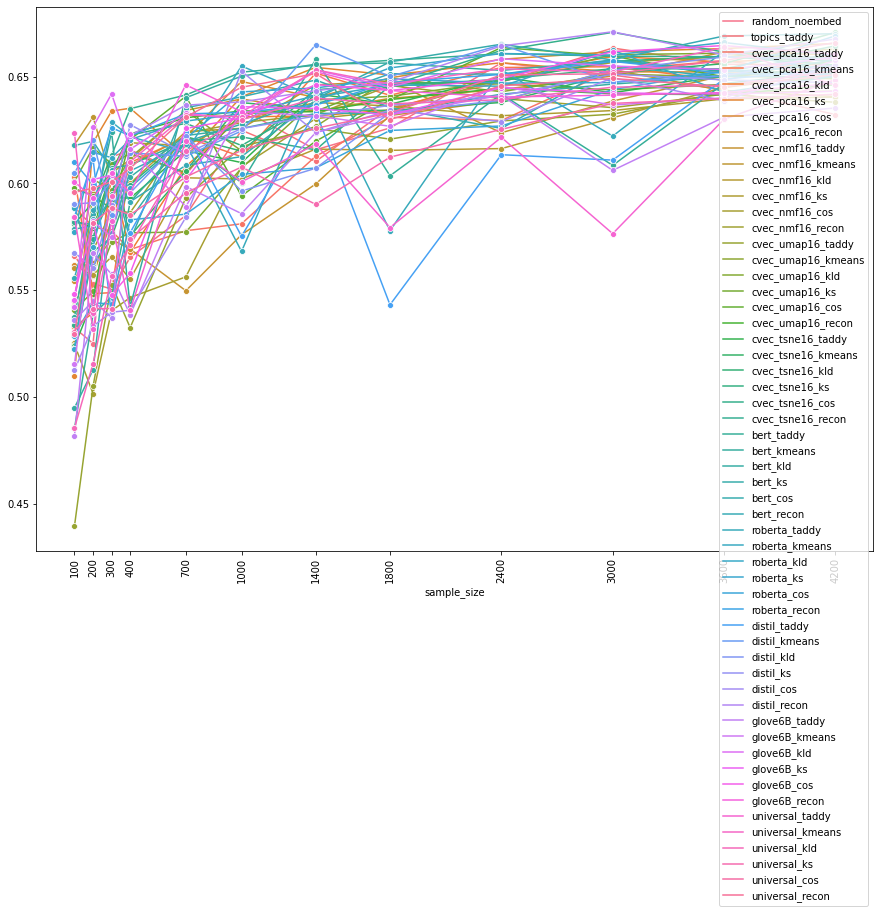

In [26]:
plt.figure(figsize=(15,10))
sns.lineplot(data=auc_df, marker='o', dashes=False).set(xticks=samps)
plt.legend()
plt.xticks(rotation=90)
plt.show()

### Sample size versus AUC-ROC score (comparison of methods)

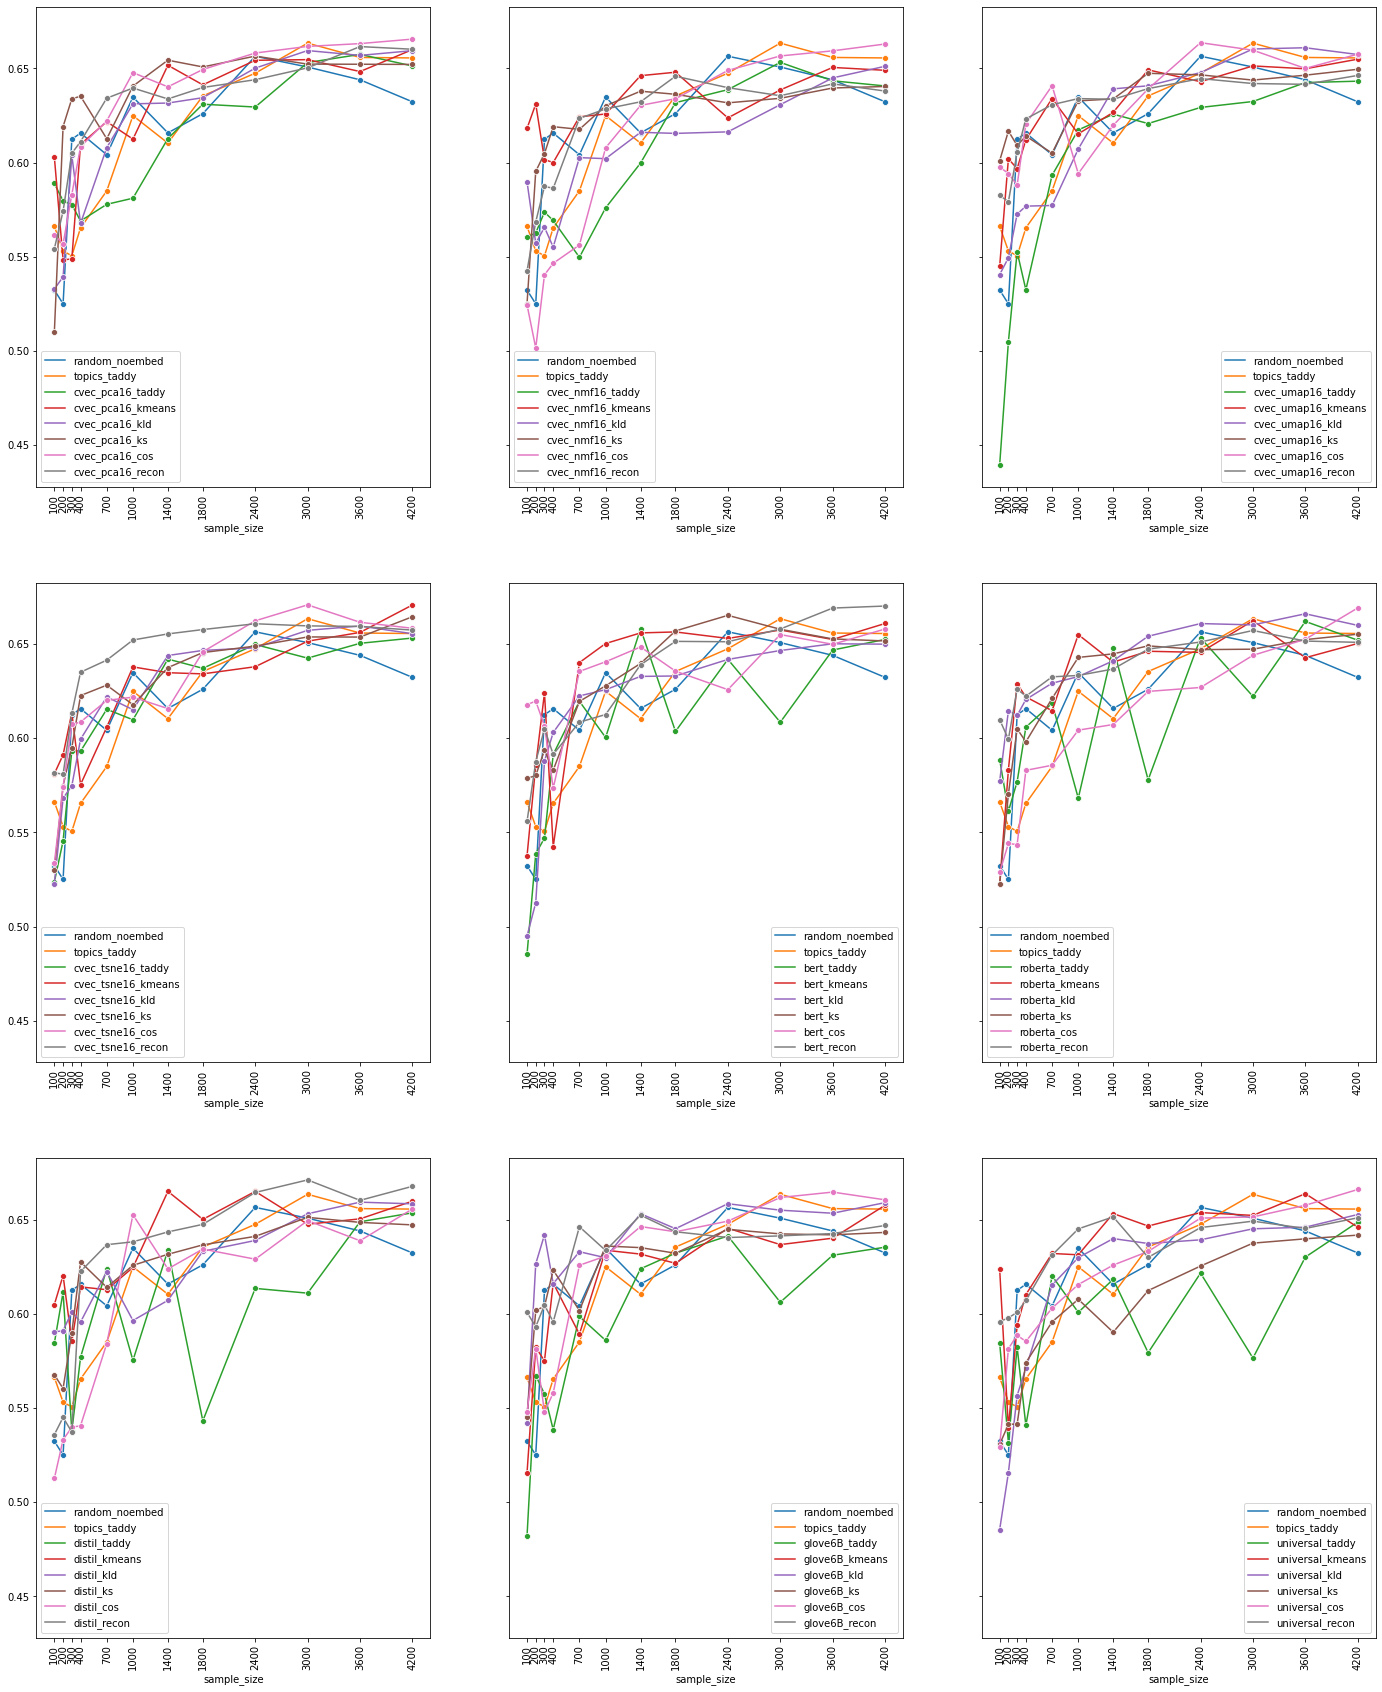

In [34]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(24,30), sharey=True)

lst = [[0,1,2,3,4,5,6,7],[0,1,8,9,10,11,12,13],[0,1,14,15,16,17,18,19],[0,1,20,21,22,23,24,25],[0,1,26,27,28,29,30,31],
       [0,1,32,33,34,35,36,37],[0,1,38,39,40,41,42,43],[0,1,44,45,46,47,48,49],[0,1,50,51,52,53,54,55]]
k=0
for i in range(3):
  for j in range(3):
    g = sns.lineplot(data=auc_df.iloc[:, lst[k]], marker='o', dashes=False, ax=axes[i,j])
    g.set(xticks=samps)
    g.set_xticklabels(samps, rotation=90)
    k+=1
plt.show()

### Sample size versus AUC-ROC score (comparison of embeddings)

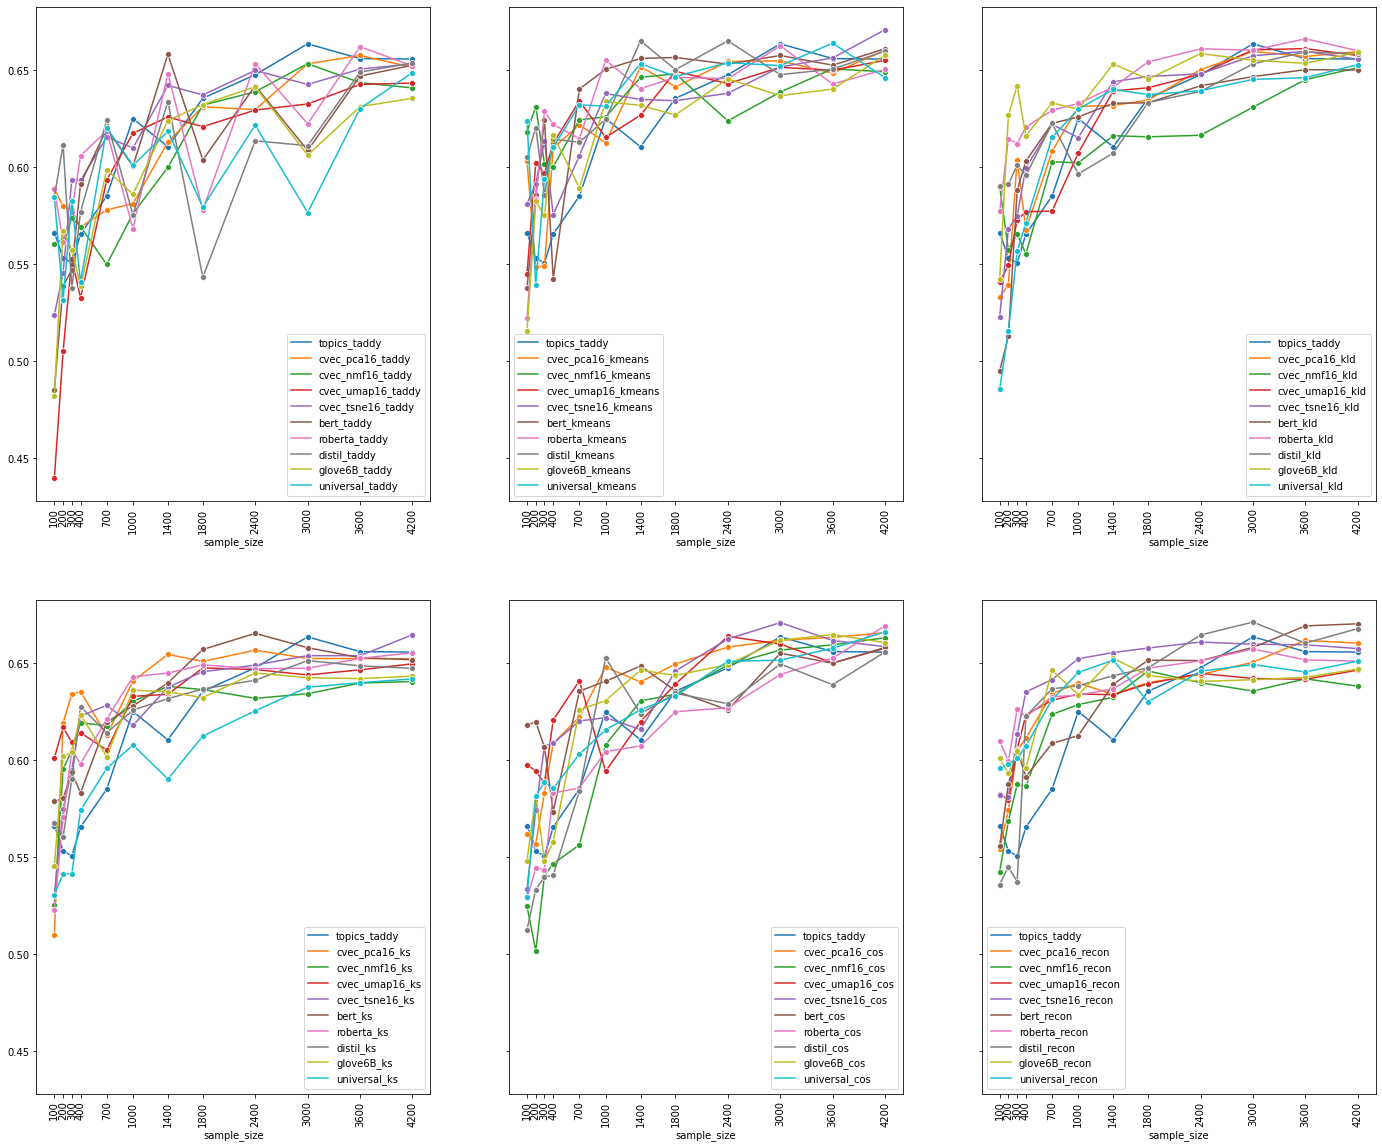

In [33]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24,20), sharey=True)

lst = [[1,2,8,14,20,26,32,38,44,50],[1,3,9,15,21,27,33,39,45,51],[1,4,10,16,22,28,34,40,46,52],
       [1,5,11,17,23,29,35,41,47,53],[1,6,12,18,24,30,36,42,48,54],[1,7,13,19,25,31,37,43,49,55]]
k=0
for i in range(2):
  for j in range(3):
    g = sns.lineplot(data=auc_df.iloc[:, lst[k]], marker='o', dashes=False, ax=axes[i,j], palette=sns.color_palette('tab10', n_colors=10))
    g.set(xticks=samps)
    g.set_xticklabels(samps, rotation=90)
    k+=1
plt.show()